In [1]:
import keras 
keras.__version__

'2.4.3'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'

-rw------- 1 root root 90618980 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip'


In [4]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/dogs_and_cats_small.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/dogs_and_cats_small.zip
  inflating: test/cats/cat.1501.jpg  
  inflating: test/cats/cat.1502.jpg  
  inflating: test/cats/cat.1503.jpg  
  inflating: test/cats/cat.1504.jpg  
  inflating: test/cats/cat.1505.jpg  
  inflating: test/cats/cat.1506.jpg  
  inflating: test/cats/cat.1507.jpg  
  inflating: test/cats/cat.1508.jpg  
  inflating: test/cats/cat.1509.jpg  
  inflating: test/cats/cat.1510.jpg  
  inflating: test/cats/cat.1511.jpg  
  inflating: test/cats/cat.1512.jpg  
  inflating: test/cats/cat.1513.jpg  
  inflating: test/cats/cat.1514.jpg  
  inflating: test/cats/cat.1515.jpg  
  inflating: test/cats/cat.1516.jpg  
  inflating: test/cats/cat.1517.jpg  
  inflating: test/cats/cat.1518.jpg  
  inflating: test/cats/cat.1519.jpg  
  inflating: test/cats/cat.1520.jpg  
  inflating: test/cats/cat.1521.jpg  
  inflating: test/cats/cat.1522.jpg  
  inflating: test/cats/cat.1523.jpg  
  inflating: test/cats/cat.1524.jpg  
  inf

In [5]:
!ls -l

total 20
drwx------ 5 root root 4096 Apr  1 11:01 drive
drwxr-xr-x 1 root root 4096 Mar 25 13:38 sample_data
drwxr-xr-x 4 root root 4096 Apr  1 11:01 test
drwxr-xr-x 4 root root 4096 Apr  1 11:01 train
drwxr-xr-x 4 root root 4096 Apr  1 11:01 validation


In [6]:
train_dir = 'train'
valid_dir = 'validation'
test_dir = 'test'

In [7]:
# from keras.applications import VGG16

# conv_base = VGG16(weights ='imagenet', include_top=True, input_shape=(224,224,3))

# conv_base.summary()

In [8]:
from keras.applications import VGG16

conv_base = VGG16(weights ='imagenet', include_top=False, input_shape=(150,150,3))

conv_base.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [25]:
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4,4,512)) #마지막 conv size
  labels = np.zeros(shape =(sample_count))
  print(features.shape, labels.shape)

  generator = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size, class_mode='binary')

  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch) 
    features[i*batch_size : (i+1)*batch_size] = features_batch # 예측값을 np.zeros에 덮어쓴다는건데.. 예측값을 왜??
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  print(features[:1], labels[:1])
  return features, labels

In [26]:
train_features, train_labels = extract_features(train_dir, 2000)
valid_features, valid_labels = extract_features(valid_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

(2000, 4, 4, 512) (2000,)
Found 2000 images belonging to 2 classes.
[[[[0.         0.         0.         ... 0.         0.61930829
    0.        ]
   [0.         0.         1.11786199 ... 0.         0.50969863
    0.        ]
   [0.06118321 0.         1.12000656 ... 0.         0.6363287
    0.        ]
   [0.         0.         0.         ... 0.         0.68874317
    0.        ]]

  [[0.03325118 0.         0.58905739 ... 0.         0.63443995
    0.        ]
   [0.14184174 0.         2.26138091 ... 0.59773552 0.18023413
    0.        ]
   [0.19979134 0.         2.16378427 ... 0.53955454 0.65118027
    0.        ]
   [0.19861268 0.         0.55196077 ... 0.18244576 1.02323723
    0.        ]]

  [[0.24714017 0.         0.22446555 ... 0.         0.59228086
    0.        ]
   [0.36434087 0.30711418 2.24714065 ... 0.25592926 0.39259595
    0.        ]
   [0.34710252 0.15671962 2.15173864 ... 0.41488877 0.95233089
    0.        ]
   [0.6441074  0.         0.60464066 ... 0.13992766 1.238890

In [27]:
train_features.shape, valid_features.shape, test_features.shape

((2000, 4, 4, 512), (1000, 4, 4, 512), (1000, 4, 4, 512))

In [28]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
valid_features = np.reshape(valid_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))
train_features.shape, valid_features.shape, test_features.shape

((2000, 8192), (1000, 8192), (1000, 8192))

In [29]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Dense(256, activation ='relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [30]:
Hist = model.fit(train_features, train_labels, epochs=100, batch_size=20, validation_data=(valid_features, valid_labels))

Epoch 1/100
100/100 [==============================] - 1s 5ms/step - loss: 0.6419 - accuracy: 0.7187 - val_loss: 0.3151 - val_accuracy: 0.8680
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.9033 - val_loss: 0.2534 - val_accuracy: 0.9010
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2124 - accuracy: 0.9199 - val_loss: 0.2703 - val_accuracy: 0.8880
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1801 - accuracy: 0.9264 - val_loss: 0.2981 - val_accuracy: 0.8710
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1561 - accuracy: 0.9435 - val_loss: 0.2672 - val_accuracy: 0.9030
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1102 - accuracy: 0.9577 - val_loss: 0.2607 - val_accuracy: 0.9040
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9761 - val_loss: 0.2674 - val_accuracy: 0.9000

In [31]:
loss, accuracy = model.evaluate(test_features, test_labels)

loss, accuracy

32/32 [==============================] - 0s 3ms/step - loss: 0.8709 - accuracy: 0.8800


(0.8708651661872864, 0.8799999952316284)

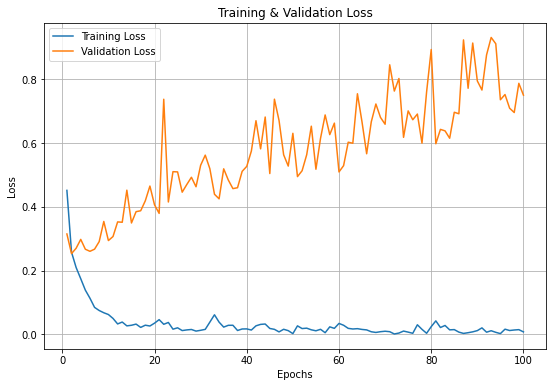

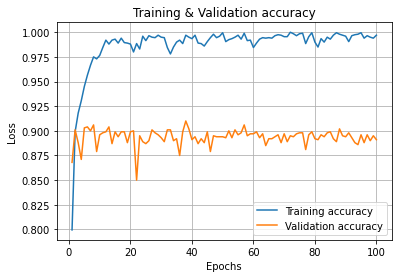

In [32]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.title('Training & Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()